In [7]:
import os
from collections import namedtuple

In [21]:
def read_spektr(f):
    file_path = os.path.abspath(f)
    file = open(file_path)

    header = file.readline().split()
    print(header)

    spektr = { h: [] for h in header }

    print(spektr)

    lines = file.readlines()
    table = []
    for line in lines:
        #print(line)
        table.append(line.split())

    print(len(table))
  

    for row in table:
        for index, (p, item) in enumerate(spektr.items()):
            #print(p, item, index)
            item.append(float(row[index]))

    return spektr     

In [22]:
spektr = read_spektr("spektr.utf8.txt")

['ntor', '|An|^2', 'Re[An]', 'Im[An]', 'Ntor']
{'ntor': [], '|An|^2': [], 'Re[An]': [], 'Im[An]': [], 'Ntor': []}
401


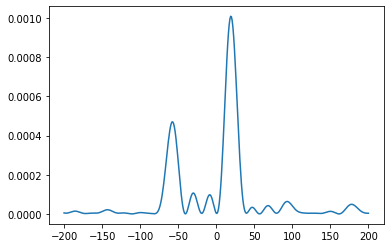

In [23]:
import matplotlib.pyplot as plt
plt.plot(spektr['ntor'], spektr['|An|^2'])


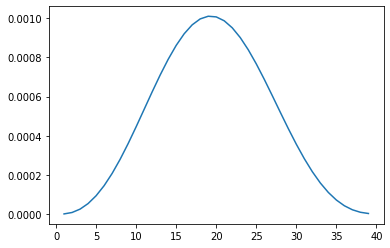

In [37]:
sp = [x for x in zip(spektr['ntor'], spektr['|An|^2'])]
#for t in zip(spektr['ntor'], spektr['|An|^2']):
#    print('%s: %s' % t)
#print(sp)
sp_cut = [ s for s in sp if (s[0]>0 and s[0]<40)]

x = [s[0] for s in sp_cut]
y = [s[1] for s in sp_cut]
plt.plot(x,y)
